[ 0.       0.00037  0.00147  0.0033   0.00584  0.0091   0.01305  0.01769
  0.02297  0.02887  0.0354   0.04252  0.05022  0.05841  0.06707  0.0762
  0.08579  0.09579  0.10605  0.11639  0.12656  0.13615  0.14458  0.15139
  0.15643  0.15982  0.16164  0.16188  0.16058  0.15792  0.15415  0.14937
  0.14365  0.1371   0.1298   0.12184  0.11333  0.10432  0.09493  0.08525
  0.07544  0.06553  0.05557  0.0458   0.03634  0.02746  0.01815  0.00834
  0.      -0.00583 -0.01096 -0.0147  -0.01591 -0.01512 -0.01424 -0.01318
 -0.01196 -0.01054 -0.00904 -0.00746 -0.00582 -0.0042  -0.00259 -0.00103
  0.00046  0.00188  0.00321  0.00443  0.00553  0.00649  0.00731  0.00799
  0.00856  0.00898  0.00929  0.00948  0.00959  0.0097   0.00987  0.01023
  0.01017  0.00916  0.0069   0.0039   0.00135  0.     ]
[array([9.99465e-01, 9.97325e-01, 9.93055e-01, 9.86675e-01, 9.78215e-01,
       9.67705e-01, 9.55190e-01, 9.40725e-01, 9.24370e-01, 9.06205e-01,
       8.86300e-01, 8.64735e-01, 8.41610e-01, 8.17025e-01, 7.91085e-01

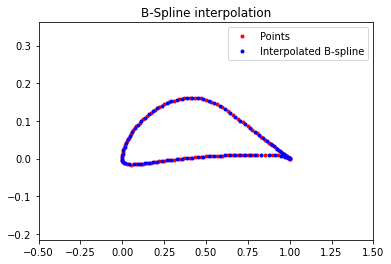

In [5]:
import numpy as np
from scipy import interpolate
import pandas as pd
import os
import matplotlib.pyplot as plt

airfoil_data_path = "D:\\JupyterNBook\\Airfoildata\\Shapedata\\"
f = airfoil_data_path+"fx72ls160-KISTI.dat"
df = pd.read_csv(f, na_filter=True, dtype='float64', delimiter=' ', skipinitialspace=True, skiprows=3, header=None)
ctr = df.values

# ctr =np.array( [(3 , 1), (2.5, 4), (0, 1), (-2.5, 4),
# (-3, 0), (-2.5, -4), (0, -1), (2.5, -4), (3, -1),])
x = ctr[:,0]
y = ctr[:,1]
xm= 0.5*(ctr[1:,0]+ctr[0:-1,0])
ym= 0.5*(ctr[1:,1]+ctr[0:-1,1])

# # uncomment both lines for a closed curve
# #x=np.append(x,[x[0]])
# #y=np.append(y,[y[0]])
# l=len(x)
# t=np.linspace(0,1,l-2,endpoint=True)
# t=np.append([0,0,0],t)
# t=np.append(t,[1,1,1])
# tck=[t,[x,y],3]
# u3=np.linspace(0,1,(max(l*2,70)),endpoint=True)
# out = interpolate.splev(u3,tck)
# plt.plot(x,y,'k--',label='Control polygon',marker='o',markerfacecolor='red')
# #plt.plot(x,y,'ro',label='Control points only')
# plt.plot(out[0],out[1],'b',linewidth=2.0,label='B-spline curve')
# plt.legend(loc='best')
# plt.axis([min(x)-1, max(x)+1, min(y)-1, max(y)+1])
# plt.title('Cubic B-spline curve evaluation')
#plt.show()

#####################

tck, u = interpolate.splprep([xm,ym],k=3,s=0)
#u = np.linspace(0,1,num=200,endpoint=True)
print(y)
#print(tck,u)
#u = xm
out = interpolate.splev(u,tck)
der = interpolate.splev(u,tck, der=1)
mag_der = np.sqrt(der[0]*der[0]+der[1]*der[1])
[nx,ny] = [-der[1]/mag_der,der[0]/mag_der]
print(out)
plt.figure()
plt.plot(x, y, 'r.', out[0], out[1], 'b.')
plt.legend(['Points', 'Interpolated B-spline', 'True'],loc='best')
plt.axis([min(x)-0.5, max(x)+0.5, min(y)-0.2, max(y)+0.2])
plt.title('B-Spline interpolation')
plt.show()

['2032c-KISTI.dat', 'a18-KISTI.dat', 'a18sm-KISTI.dat', 'a63a108c-KISTI.dat', 'ag03-KISTI.dat', 'ag04-KISTI.dat', 'ag08-KISTI.dat', 'ag09-KISTI.dat', 'ag10-KISTI.dat', 'ag11-KISTI.dat']


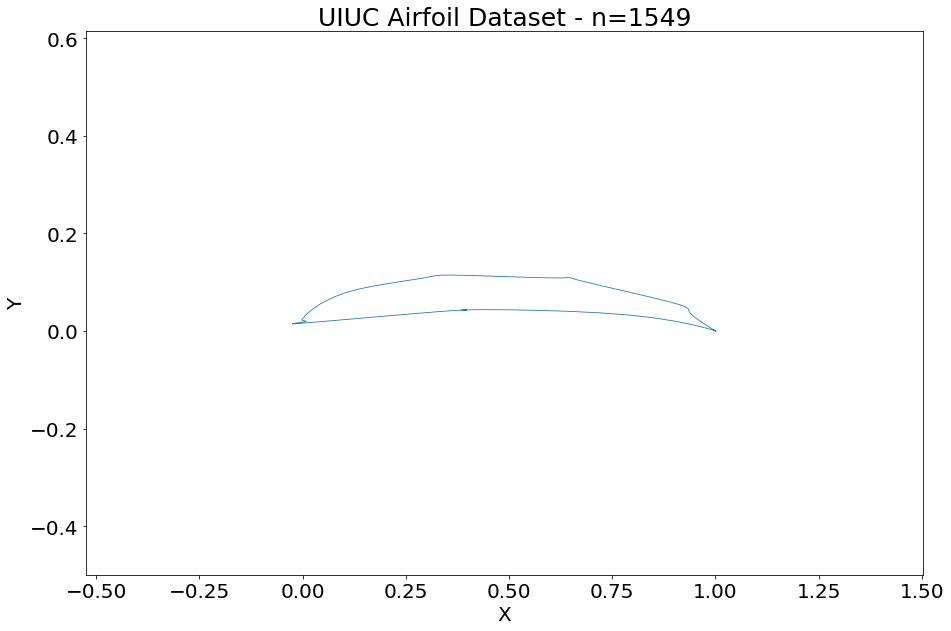

In [91]:
import numpy as np
from scipy import interpolate
import pandas as pd
import os
import matplotlib.pyplot as plt
import time

airfoil_data_path = "d:\JupyterNBook\Airfoildata\Shapedata\\"
file_name = os.listdir(airfoil_data_path)
print(file_name[0:10])

plt.figure(figsize=(15,10))
for i in range(270,271): 
    f = airfoil_data_path+ file_name[i] 
    #print(f)
    df = pd.read_csv(f, na_filter=True, dtype='float64', delimiter=' ', skipinitialspace=True, skiprows=3, header=None)
    ctr = df.values
    x = ctr[:,0]
    y = ctr[:,1]    
    plt.plot(x, y, linewidth=0.8)
    #time.sleep(0.1)
#plt.legend(['Airfoi'+str(i+1)],loc='best')
plt.axis([min(x)-0.5, max(x)+0.5, min(y)-0.5, max(y)+0.5])
plt.xlabel('X', fontsize=20)
plt.ylabel('Y', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('UIUC Airfoil Dataset - n=1549', fontsize=25)
plt.show()

['2032c-KISTI.dat', 'a18-KISTI.dat', 'a18sm-KISTI.dat', 'a63a108c-KISTI.dat', 'ag03-KISTI.dat', 'ag04-KISTI.dat', 'ag08-KISTI.dat', 'ag09-KISTI.dat', 'ag10-KISTI.dat', 'ag11-KISTI.dat']


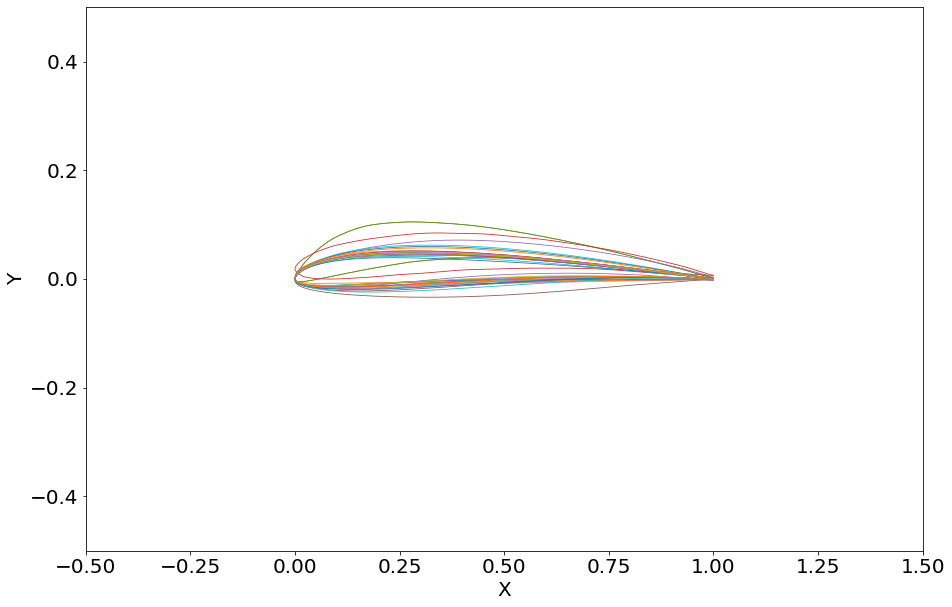

In [3]:
import numpy as np
from scipy import interpolate
import pandas as pd
import os
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, writers
import time

airfoil_data_path = "d:\JupyterNBook\Airfoildata\Shapedata\\"
file_name = os.listdir(airfoil_data_path)
print(file_name[0:10])

fg = plt.figure(figsize=(15,10))
#fig, ax = plt.subplots(figsize=(15, 10))
#ax = plt.axis([-0.5, 1.5, min(y)-0.5, max(y)+0.5])
ax = plt.axes(xlim=(-0.5, 1.5), ylim=(-0.5, 0.5))
plt.xlabel('X', fontsize=20)
plt.ylabel('Y', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
#plt.title('UIUC Airfoil Dataset - n=', fontsize=25)
line, = ax.plot([], [], lw=0.8)

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    #line = plt.plot([], [])
    return line,

#for i in range(0,1000): 
# animation function.  This is called sequentially
def animate(i):
    f = airfoil_data_path+ file_name[i] 
    #print(f)
    df = pd.read_csv(f, na_filter=True, dtype='float64', delimiter=' ', skipinitialspace=True, skiprows=3, header=None)
    ctr = df.values
    x = ctr[:,0]
    y = ctr[:,1]
    #line.set_data(x, y)
    plt.plot(x, y, linewidth=0.8)

#plt.legend(['Airfoi'+str(i+1)],loc='best')
#plt.axis([min(x)-0.5, max(x)+0.5, min(y)-0.5, max(y)+0.5])

# call the animator.  blit=True means only re-draw the parts that have changed.
ani = FuncAnimation(fig=fg, func=animate, frames=20, interval=1) #interval=1, , init_func=init
Writer = writers['ffmpeg']
writer = Writer(fps=15, metadata={'artist': 'Me'}, bitrate=1800) #'imagemagick'
ani.save('exAnimation.avi', writer) #, fps=30, dpi=100 'imagemagick'

plt.show()

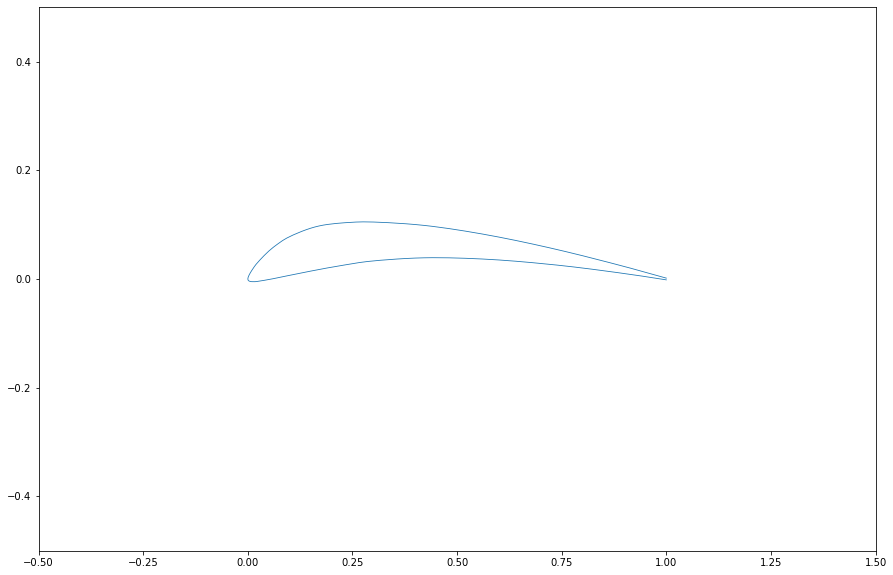

In [58]:
fig = plt.figure(figsize=(15,10))
#ax = plt.axis([-0.5, 1.5, min(y)-0.5, max(y)+0.5])
ax = plt.axes(xlim=(-0.5, 1.5), ylim=(-0.5, 0.5))
line, = ax.plot([], [], lw=0.8)

f = airfoil_data_path+ file_name[0] 
#print(f)
df = pd.read_csv(f, na_filter=True, dtype='float64', delimiter=' ', skipinitialspace=True, skiprows=3, header=None)
ctr = df.values
x = ctr[:,0]
y = ctr[:,1] 
line.set_data(x, y)
#plt.plot(x, y, linewidth=0.8)
#plt.show()